## Projet Manipulation image

## Valeurs de couleurs
R ( 8 bits) intensite pour la couleur rouge
G ( 8 bits) intensite pour la couleur verte
B ( 8 bits ) intensite pour la couleur bleu
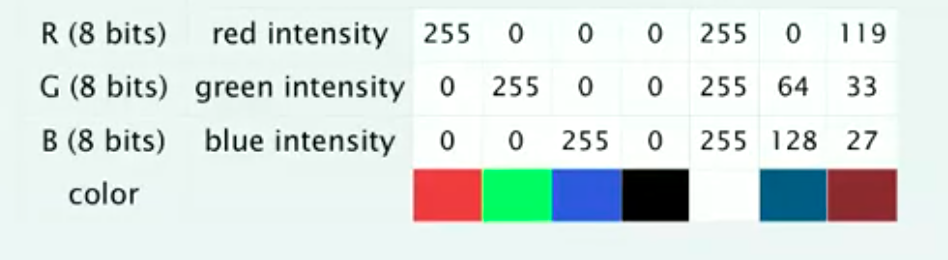

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.image as mpimg


In [4]:
## Image Processing
class Picture:
    '''
    Creer une image à partir d'un fichier en utilisant la fonction imread() de matplotlig.image ou plus généralement la 
    librairie Pillow
    '''
    def __init__(self,nomFichier = None,H = None, W = None):
        if nomFichier == None:
                
            '''
            Creer une image blanche de hauteur H et de largeur W
            '''
            self.H = H
            self.W = W
            self.image = np.zeros((H,W,3))
        else:
                
            '''
            Creer une image à partir d'un fichier
            '''
            self.image = mpimg.imread(nomFichier)
            self.H = self.image.shape[1]
            self.W = self.image.shape[0]
     
    
    '''
    Retourne la hauteur H
    '''
    def getH(self):
        return self.H
    '''
    Retourne la largeur W
    '''
    def getW(self):
        return self.W
    '''
    Retourne le tableau numpy constituant l'image
    '''
    def getImg(self):
        return self.image

    '''
    Retourne les couleurs R,G, B sous forme de liste du pixel à la ligne row et la colonne col
    '''    
    def getCouleur(self,row, col):
        red   = self.getImg()[row, col, 0] # 0 est le rouge
        green = self.getImg()[row, col, 1]  # 1 est le vert
        blue  = self.getImg()[row, col, 2] 
        return [red, green, blue]
    '''
    Modifie les couleurs R,G,B du pixel à la ligne row et la colonne col
    '''
    def setCouleur(self,row, col,couleur):
        self.getImg()[row, col, 0] = couleur.getR()   
        self.getImg()[row, col, 1] = couleur.getG()
        self.getImg()[row, col, 2] = couleur.getB()
        return self.getImg()[row, col, 0], self.getImg()[row, col, 0], self.getImg()[row, col, 0] 
    ''''
    Affiche une image
    '''
    def affiche(self):
        plt.imshow(self.image, vmin = 0, vmax = 255)
    '''
    Sauve  une image dans un fichier png
    '''
    def save(self, nomFichier):
        
        plt.imsave(nomFichier, self.image, format = 'png')
        
        
         '''   class Picture: C est la complexité
    def __init__:
        C = 7
        # on a 1 operation pour la condition et 6 pour les valeurs si vraie et si fausse
    def getH:
        C = 1
        # Un acces aux données
    def getW:
        C = 1
        # Un acces aux données
    def getimg:
        C = 1
        # Un acces aux données
    def getCouleur:
        C = 9
        # On a 3 fois une ligne de code qui récuppére la ligne(c=1) et la colonne(c=1) et l'affecte à une couleur(c=1)
    def setCouleur:
        C = 3
        # On a 3 fois une ligne de code qui modifie les couleurs par affectation'''

## Convertir une image couleur en grayscale
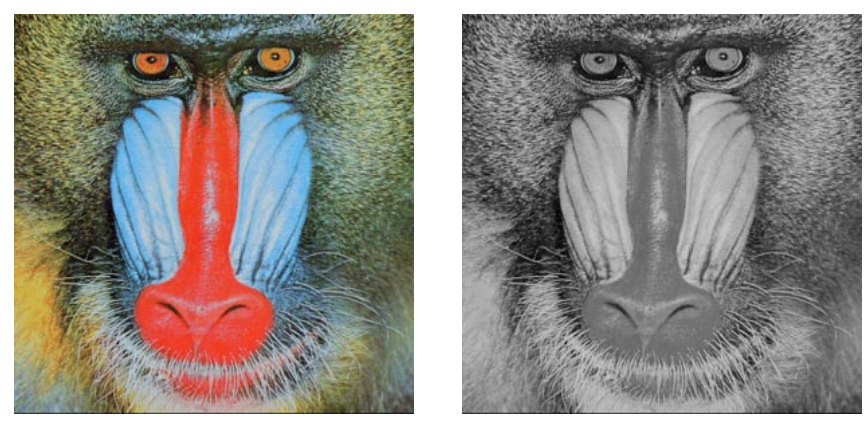



## Changer l'échelle d'une image en inversant la hauteur et la largeur en gardant les mêmes proportions
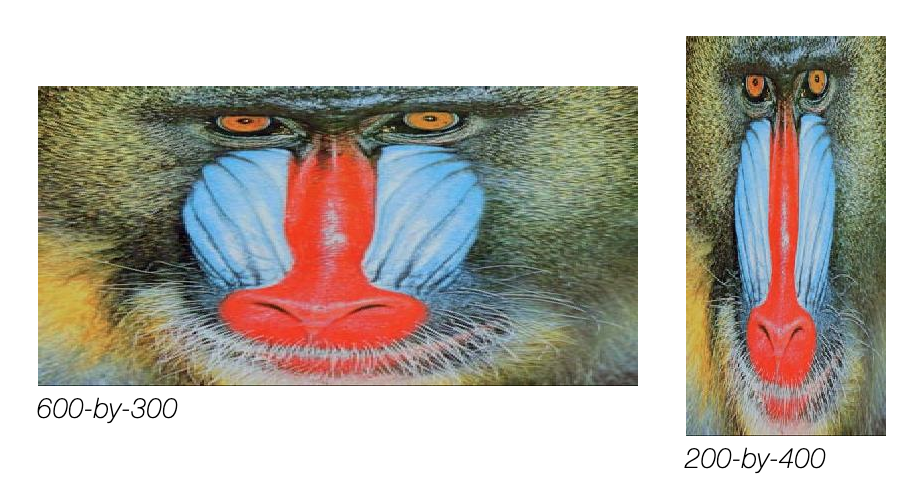



## Separation de couleurs
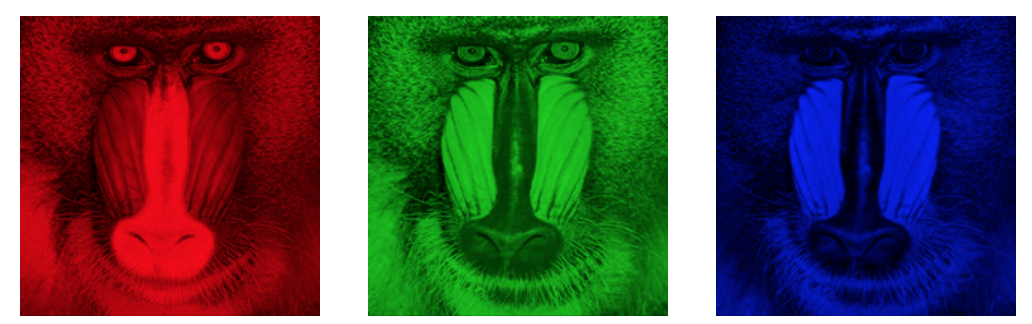

## Glass Filter
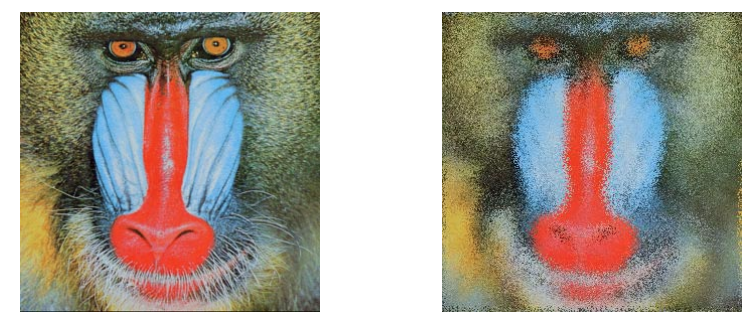

In [22]:
## Image processing
class ImageProcessing:
    
    def __init__(self,image):
        self.image = image
    '''
    Helper function
    '''
    def __calGray__(listePixel): # cette fonction ne fonctionne pas
        A = math.floor(0.299*listePixel[0] + 0.587*listePixel[1] + 0.114*listePixel[2])
        return np.ndarray([A,A,A])
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Appliquer les fonctions map, reduce ou filter pour reduire la complexite
    '''
    def transformGrayscaleMap(self):
        grayPicture = Picture(path,self.image.W,self.image.H)
        grayPicture.image = map(self.__calGray__,self.image[:, :])
        return grayPicture 
        
    '''
    
     Transformer en grayscale et visualiser l'image et sa transformée
     Une classe gloutonne avec des boucles for
    '''
    
    def transformGrayscaleGlouton(self):
        grayPicture = Picture(None,self.image.W,self.image.H)
        for i in range(grayPicture.H-1):
            for j in range(grayPicture.W-1):
                A = (0.299*self.image.image[i, j, 0] + 0.587*self.image.image[i, j, 1]
                               + 0.114*self.image.image[i, j, 2])
                grayPicture.image[i, j] = np.array([A, A, A]) # mettre chaque pixel en niveau de gris
        return grayPicture 
             
        
    '''
     Creer une image en inversant les proportions de l'image source. Afficher les deux images
    '''
    def transformScale(self):
        pass
    '''
    Separer les couleurs d'une image et visualiser les trois couleurs
    '''
    def separerCouleur(self):
        imgrouge = Picture(None,self.image.W,self.image.H)
        imgvert = Picture(None,self.image.W,self.image.H)
        imgbleu = Picture(None,self.image.W,self.image.H)
        for i in range(imgrouge.H-1):
            for j in range(imgrouge.W-1):
                imgrouge.image[i, j] = np.array([self.image.image[i, j, 0], 0, 0])
                imgvert.image[i, j] = np.array([0, self.image.image[i, j, 1], 0])
                imgbleu.image[i, j] = np.array([0, 0, self.image.image[i, j, 2]])
        return imgrouge, imgvert, imgbleu
    '''
    Filtre de glace: Affecter à chaque pixel p la couleur d'un pixel voisin choisi alétoirement
    (Les coordonnées du pixel et de p doivent différer d'au plus 5).
    Afficher les deux images 
    '''
    def filtreGlass(self):
        pass
    def convolution2D(X,H,moitie):
        s = X.shape
        py = (H.shape[0]-1)//2
        px = (H.shape[1]-1)//2
        Y = X.copy()
        if moitie:
            imax = s[1]//2
        else:
            imax = s[1]-px
        for i in range(0,imax):
            for j in range(py,s[0]-py):
                somme = 0.0
                for k in range(-px,px+1):
                    for l in range(-py,py+1):
                        somme += X[j+l][i+k]*H[l+py][k+px]
                Y[j][i] = somme
        return Y
  

# Filtre Gaussien
    import math
    def filtreGaussien(P):
        epsilon = 0.05
        sigma = P*1.0/math.sqrt(-2*math.log(epsilon))
        h = numpy.zeros((2*P+1,2*P+1))
        som = 0
        for m in range(-P,P+1):
            for n in range(-P,P+1):
                h[m+P][n+P] = math.exp(-(n*n+m*m)/(2*sigma*sigma))
                som += h[m+P][n+P]
        h = h/som
        return h
    
'''class ImageProcessing:
    def __init__:
        C = 1
        # On a une affectation
    def __CalGray__:
        C = 6
        # On a 6 opérations
    def  transformGrayscaleMap:
        C = 2
        # On a 2 actions à cause de la reduction de complexité
    def transformGrayscaleGlouton:
        C = 6
        # On a 3 opérations, un accés aux données, une sauvegarde et une implémentation
    def transformScale:
        C = 4
        # On a 4 manipulations
    def separerCouleur:
        C = 10
        # On a 4 acces aux donnes, 3 affectations et 3 sauvegardes'''

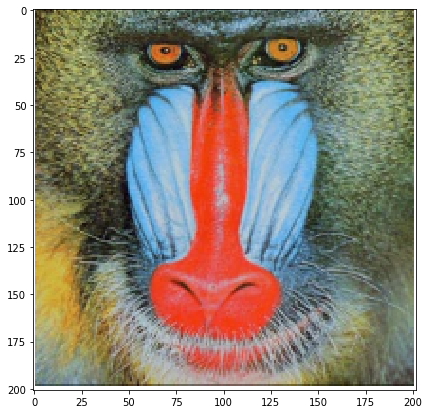

In [9]:
imge = Picture('laye.png') 
# affichage image
plt.figure(figsize=(7,7))
imge.affiche()

In [10]:
#getH()
print("retour de la hauteur H= ",imge.getH())

 
# getW()
print("retour de la largeur L= ",imge.getW())

#retour du tableau numpy
print('le tableau numpy constituant limage',imge.getImg())

retour de la hauteur H=  202
retour de la largeur L=  201
le tableau numpy constituant limage [[[1.         1.         1.         1.        ]
  [0.4117647  0.36078432 0.22745098 1.        ]
  [0.29411766 0.26666668 0.11372549 1.        ]
  ...
  [0.34509805 0.34117648 0.19607843 1.        ]
  [0.3254902  0.32156864 0.1764706  1.        ]
  [1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.        ]
  [0.28627452 0.24313726 0.10588235 1.        ]
  [0.4        0.3647059  0.20784314 1.        ]
  ...
  [0.32156864 0.32941177 0.1764706  1.        ]
  [0.5921569  0.6039216  0.44705883 1.        ]
  [1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.        ]
  [0.18039216 0.14117648 0.02745098 1.        ]
  [0.3764706  0.3372549  0.19215687 1.        ]
  ...
  [0.3647059  0.3764706  0.22352941 1.        ]
  [0.43529412 0.44705883 0.29411766 1.        ]
  [1.         1.         1.         1.        ]]

 ...

 [[1.       

(<matplotlib.axes._subplots.AxesSubplot at 0x186873fa448>,
 <matplotlib.image.AxesImage at 0x1868744ef48>)

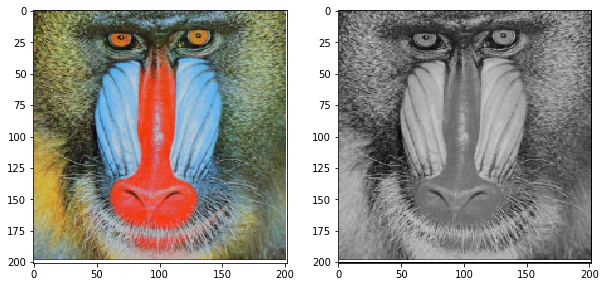

In [13]:

#ImageProcessing
laye1 = ImageProcessing(imge)

#transformGrayscaleGlouton()
imgegray = laye1.transformGrayscaleGlouton()
plt.figure(figsize =(10, 10))
plt.subplot(121), plt.imshow(imge.image)
plt.subplot(122), plt.imshow(imgegray.image)

(<matplotlib.axes._subplots.AxesSubplot at 0x186874b1e08>,
 <matplotlib.image.AxesImage at 0x1868751c048>)

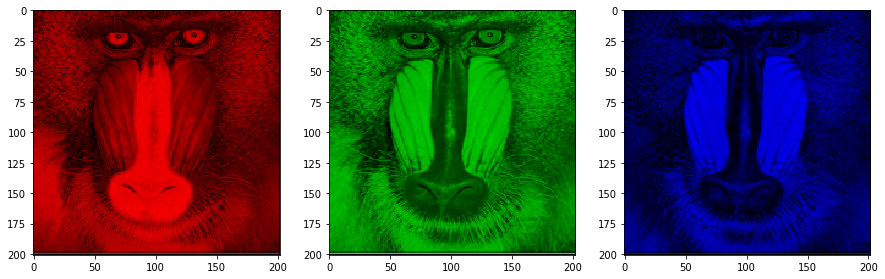

In [14]:
imgrouge, imgvert, imgbleu = laye1.separerCouleur()
plt.figure(figsize =(15, 15))
plt.subplot(131), plt.imshow(imgrouge.image)
plt.subplot(132), plt.imshow(imgvert.image)
plt.subplot(133), plt.imshow(imgbleu.image)


(<matplotlib.axes._subplots.AxesSubplot at 0x186cb2d3e88>,
 <matplotlib.image.AxesImage at 0x186bc908b48>)

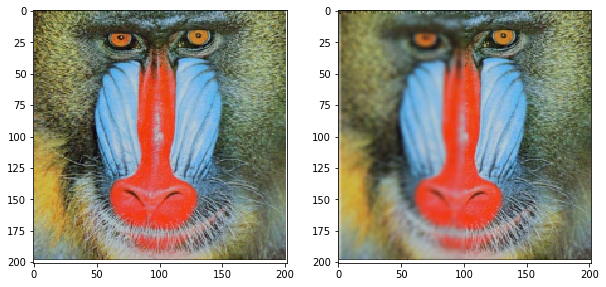

In [28]:
###FILTRE GAUSSIEN
img = mpimg.imread("laye.PNG")            
def convolution2D(X,H,moitie):
    s = X.shape
    py = (H.shape[0]-1)//2
    px = (H.shape[1]-1)//2
    Y = X.copy()
    if moitie:
        imax = s[1]//2
    else:
        imax = s[1]-px
    for i in range(0,imax):
        for j in range(py,s[0]-py):
            somme = 0.0
            for k in range(-px,px+1):
                for l in range(-py,py+1):
                    somme += X[j+l][i+k]*H[l+py][k+px]
            Y[j][i] = somme
    return Y
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]
X1 = red*0.000000001

# Filtre Gaussien
import math
def filtreGaussien(P):
    epsilon = 0.05
    sigma = P*1.0/math.sqrt(-2*math.log(epsilon))
    h = np.zeros((2*P+1,2*P+1))
    som = 0
    for m in range(-P,P+1):
        for n in range(-P,P+1):
            h[m+P][n+P] = math.exp(-(n*n+m*m)/(2*sigma*sigma))
            som += h[m+P][n+P]
    h = h/som
    return h
X2 = np.array(img)
h = filtreGaussien(3)             
Y = convolution2D(X2,h,True)
plt.figure(figsize =(10, 10))
plt.subplot(121), plt.imshow(X2)
plt.subplot(122), plt.imshow(Y)

In [17]:
laye1.filtreglass

AttributeError: 'ImageProcessing' object has no attribute 'filtreglass'

In [24]:
###FILTRE GAUSSIEN


NameError: name 'numpy' is not defined

In [ ]:
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]
X1 = red*1.0
plt.imshow(X1)

(<matplotlib.axes._subplots.AxesSubplot at 0x18687603408>,
 <matplotlib.image.AxesImage at 0x18687596388>)

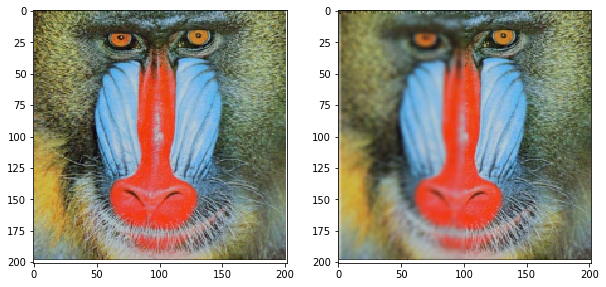

In [27]:

img = mpimg.imread("laye.PNG")            
def convolution2D(X,H,moitie):
    s = X.shape
    py = (H.shape[0]-1)//2
    px = (H.shape[1]-1)//2
    Y = X.copy()
    if moitie:
        imax = s[1]//2
    else:
        imax = s[1]-px
    for i in range(0,imax):
        for j in range(py,s[0]-py):
            somme = 0.0
            for k in range(-px,px+1):
                for l in range(-py,py+1):
                    somme += X[j+l][i+k]*H[l+py][k+px]
            Y[j][i] = somme
    return Y
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]
X1 = red*0.000000001

# Filtre Gaussien
import math
def filtreGaussien(P):
    epsilon = 0.05
    sigma = P*1.0/math.sqrt(-2*math.log(epsilon))
    h = np.zeros((2*P+1,2*P+1))
    som = 0
    for m in range(-P,P+1):
        for n in range(-P,P+1):
            h[m+P][n+P] = math.exp(-(n*n+m*m)/(2*sigma*sigma))
            som += h[m+P][n+P]
    h = h/som
    return h
X2 = np.array(img)
h = filtreGaussien(3)             
Y = convolution2D(X2,h,True)
plt.figure(figsize =(10, 10))
plt.subplot(121), plt.imshow(X2)
plt.subplot(122), plt.imshow(Y)

In [ ]:
'''## Projet Manipulation image
##Complexite des fonctions:
class Couleur:
    def __init__:
        C = 3
        #On a ici 3 affectations
    def creerCouleur:
        C = 6
        #On a 3 acces aux données en mémoire et 3 affectation pour la couleur
    def getR:
        C = 1
        #Un acces aux données
    def getG:
        C = 1
        #Un acces aux données
    def getB:
        C = 1
        #Un acces aux données
    def Brighter:
        C = 15
        #On a 3 lignes de code qui comportent chacune 4 operations et 3 affectations pour la novelle couleur
    def Darker:
        C = 9
         #On a 3 lignes de code qui comportent chacune 2 operations et 3 affectations pour la novelle couleur
    def toString:
        C = 1
        # On a un une seule action retourner un string
    def equals:
        C = 3
        # On a 3 comparaisons
    def Luminance:
        C = 6
        # On a 6 operations
    def grayScale:
        C = 6
         #On a 3 accés aux données et 3 fois la récupération du seuil
    def Compatibilite:
        C = 6
         # On a 4 opérations pour la condition et 2 pour les valeurs si vrair et si fausse
    def add:
        C = 9
         # On a 3 lignes de code qui comportent chacune 2 operations et 3 affectations pour la nouvelle couleur
    class Picture:
    def __init__:
        C = 7
        # on a 1 operation pour la condition et 6 pour les valeurs si vraie et si fausse
    def getH:
        C = 1
        # Un acces aux données
    def getW:
        C = 1
        # Un acces aux données
    def getimg:
        C = 1
        # Un acces aux données
    def getCouleur:
        C = 9
        # On a 3 fois une ligne de code qui récuppére la ligne(c=1) et la colonne(c=1) et l'affecte à une couleur(c=1)
    def setCouleur:
        C = 3
        # On a 3 fois une ligne de code qui modifie les couleurs par affectation'''
    
'''class ImageProcessing:
    def __init__:
        C = 1
        # On a une affectation
    def __CalGray__:
        C = 6
        # On a 6 opérations
    def  transformGrayscaleMap:
        C = 2
        # On a 2 actions à cause de la reduction de complexité
    def transformGrayscaleGlouton:
        C = 6
        # On a 3 opérations, un accés aux données, une sauvegarde et une implémentation
    def transformScale:
        C = 4
        # On a 4 manipulations
    def separerCouleur:
        C = 10
        # On a 4 acces aux donnes, 3 affectations et 3 sauvegardes'''